---
## Problem Statement :

   #### Prediction of flight fare by using some features like Airline, Source, Destination, Duration and others..
   
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [2]:
train_data = pd.read_csv("Data_Train.csv")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.shape

(10683, 11)

In [6]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
train_data['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
32h 55m      1
29h 10m      1
47h 40m      1
13h 35m      1
29h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data.dropna(inplace=True)

In [11]:
train_data.isna().any()

Airline            False
Date_of_Journey    False
Source             False
Destination        False
Route              False
Dep_Time           False
Arrival_Time       False
Duration           False
Total_Stops        False
Additional_Info    False
Price              False
dtype: bool

---
## Exploratory Data Analysis


<AxesSubplot:xlabel='Airline', ylabel='count'>

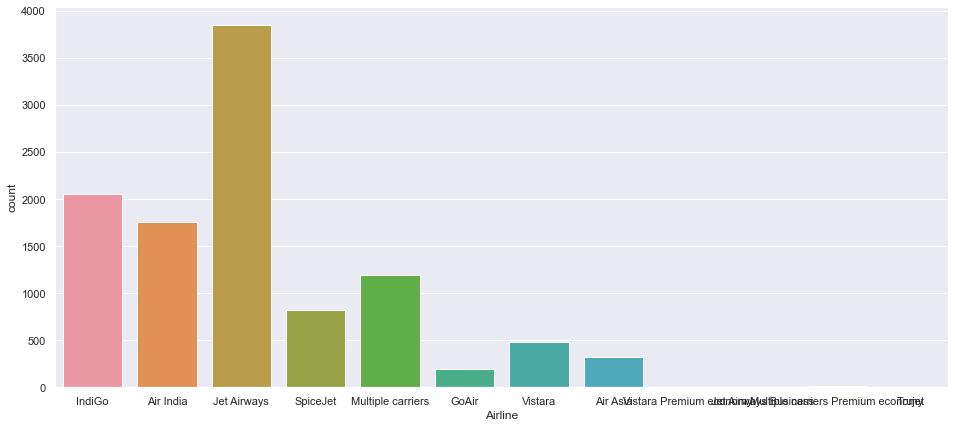

In [12]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(x='Airline',data=train_data,ax=ax)

In [13]:
train_data.Additional_Info.value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
2 Long layover                     1
1 Short layover                    1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [14]:
train_data.Route.value_counts().head(20)

DEL ? BOM ? COK          2376
BLR ? DEL                1552
CCU ? BOM ? BLR           979
CCU ? BLR                 724
BOM ? HYD                 621
CCU ? DEL ? BLR           565
BLR ? BOM ? DEL           402
MAA ? CCU                 381
DEL ? HYD ? COK           326
DEL ? JAI ? BOM ? COK     240
DEL ? BLR ? COK           232
DEL ? COK                 213
DEL ? AMD ? BOM ? COK     205
DEL ? MAA ? COK           146
DEL ? IDR ? BOM ? COK      99
DEL ? HYD ? MAA ? COK      83
DEL ? NAG ? BOM ? COK      71
CCU ? MAA ? BLR            65
DEL ? GOI ? BOM ? COK      58
DEL ? HYD ? BOM ? COK      56
Name: Route, dtype: int64

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

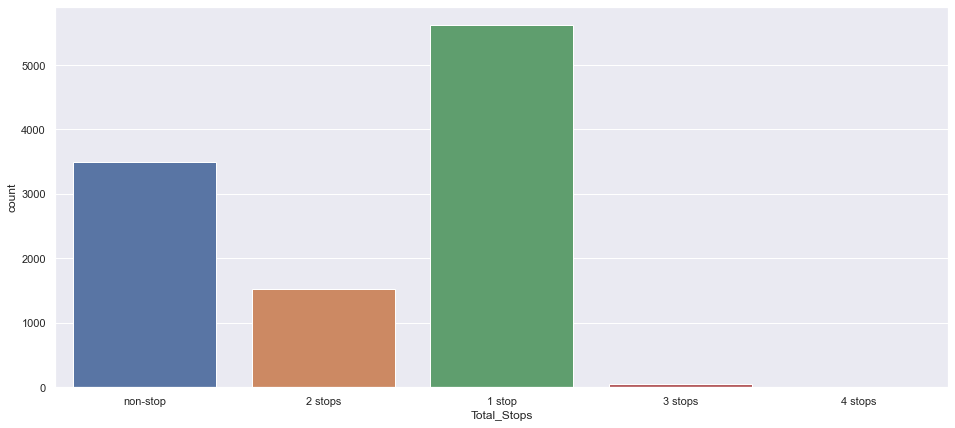

In [15]:
fig, ax = plt.subplots(figsize=(16,7))
sns.countplot(x='Total_Stops',data=train_data,ax=ax)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

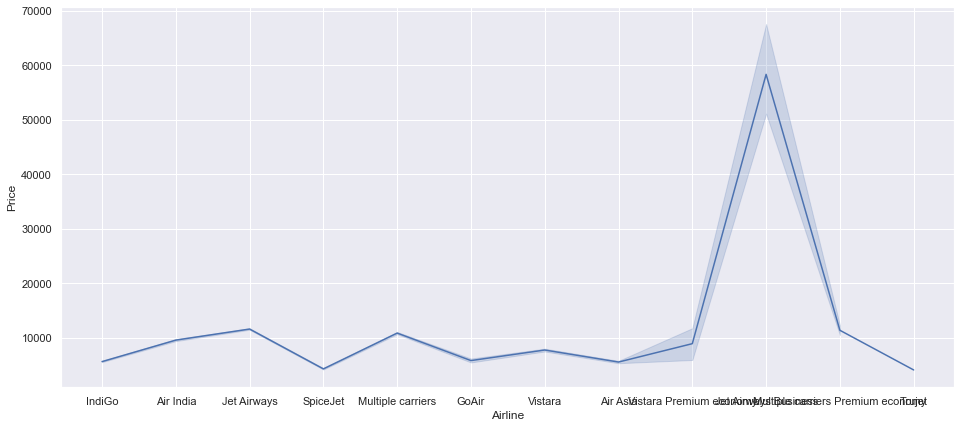

In [16]:
fig, ax = plt.subplots(figsize=(16,7))
sns.lineplot(x="Airline", y="Price", data=train_data, ax=ax)

<AxesSubplot:xlabel='Additional_Info', ylabel='Price'>

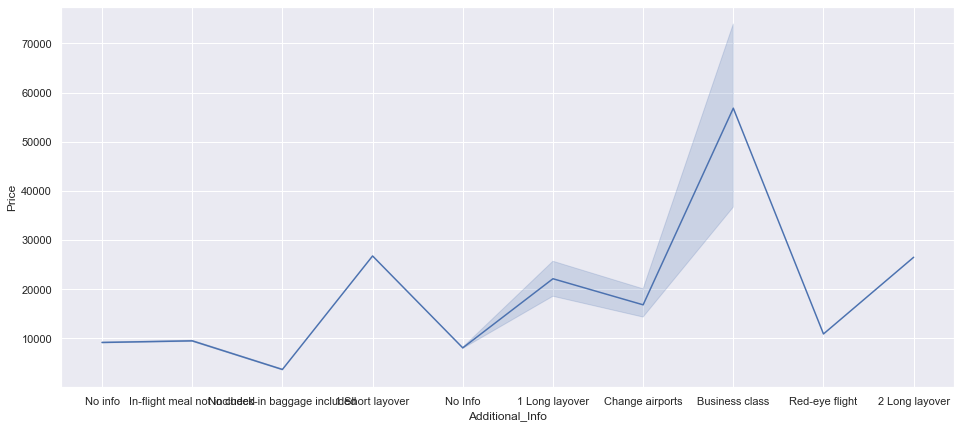

In [17]:
fig, ax = plt.subplots(figsize=(16,7))
sns.lineplot(x="Additional_Info", y="Price", data=train_data, ax=ax)

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

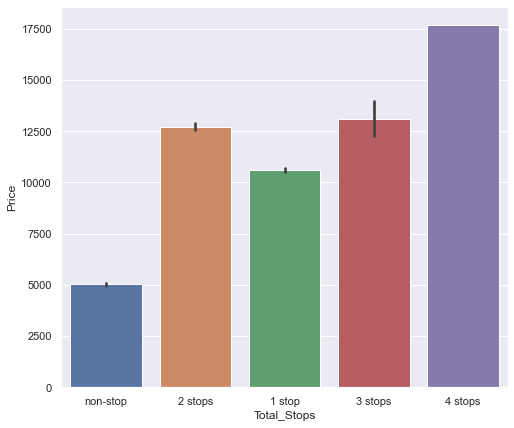

In [18]:
fig, ax = plt.subplots(figsize=(8,7))
sns.barplot(x="Total_Stops", y="Price", data=train_data, ax=ax)

<AxesSubplot:xlabel='Airline', ylabel='Price'>

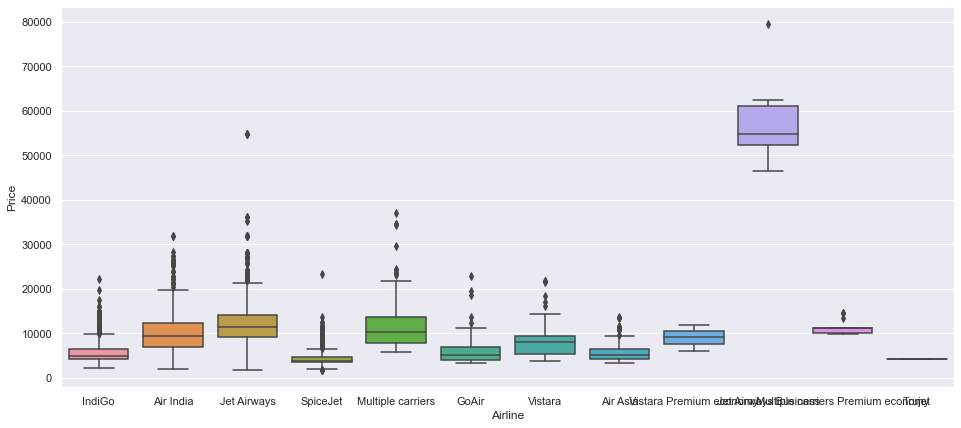

In [19]:
fig, ax = plt.subplots(figsize=(16,7))
sns.boxplot(x="Airline", y="Price", data=train_data, ax=ax)

In [20]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [21]:
train_data['Date_of_Journey'].unique()

array(['24/03/2019', '1/05/2019', '9/06/2019', '12/05/2019', '01/03/2019',
       '24/06/2019', '12/03/2019', '27/05/2019', '1/06/2019',
       '18/04/2019', '9/05/2019', '24/04/2019', '3/03/2019', '15/04/2019',
       '12/06/2019', '6/03/2019', '21/03/2019', '3/04/2019', '6/05/2019',
       '15/05/2019', '18/06/2019', '15/06/2019', '6/04/2019',
       '18/05/2019', '27/06/2019', '21/05/2019', '06/03/2019',
       '3/06/2019', '15/03/2019', '3/05/2019', '9/03/2019', '6/06/2019',
       '24/05/2019', '09/03/2019', '1/04/2019', '21/04/2019',
       '21/06/2019', '27/03/2019', '18/03/2019', '12/04/2019',
       '9/04/2019', '1/03/2019', '03/03/2019', '27/04/2019'], dtype=object)

### We see that 'Date_of_Journey' is object datatype therefore, we have to convert this datatype to timestamp
###    by using pandas -> to_datetime
    
####   Note:
    
####    .dt.month method will extract only month from that date
####    .dt.day method will extract only day from that date

In [22]:
train_data['Journey_day'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.day

In [23]:
train_data['Journey_month'] = pd.to_datetime(train_data['Date_of_Journey'], format="%d/%m/%Y").dt.month

In [24]:
train_data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6


In [25]:
train_data.drop(columns=['Date_of_Journey'], axis=1, inplace=True)

### Similar to 'Date_of_Journey' we will extract hours and minuts from 'Dep_Time'

In [26]:
train_data['Dep_Time_hrs'] = pd.to_datetime(train_data.Dep_Time).dt.hour


train_data['Dep_Time_min'] = pd.to_datetime(train_data.Dep_Time).dt.minute

In [27]:
train_data.drop(columns=['Dep_Time'], axis=1, inplace=True)

In [28]:
train_data.head(3)

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hrs,Dep_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25


### Similar to 'Date_of_Journey' & 'Dep_Time' we will extract hours and minuts from 'Arrival_Time'

In [29]:
train_data['Arrival_Time_hrs'] = pd.to_datetime(train_data.Arrival_Time).dt.hour


train_data['Arrival_Time_min'] = pd.to_datetime(train_data.Arrival_Time).dt.minute

In [30]:
train_data.drop(columns=['Arrival_Time'], axis=1, inplace=True)
train_data.head(3)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,2 stops,No info,13882,9,6,9,25,4,25


### For extracting hours and minutes from 'Duration' we need to split it

Duration is a differance between Depature Time and Arrival time

In [31]:
duration = list(train_data['Duration'])

In [32]:
for i in range(len(duration)):
    if len(duration[i].split()) != 2 :
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
            


In [33]:
duration_hours = []
duration_minute = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

In [34]:
train_data['Duration_hours'] = duration_hours
train_data['Duration_minute'] = duration_minute

### Handling Categorical data

In [35]:
train_data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration            object
Total_Stops         object
Additional_Info     object
Price                int64
Journey_day          int64
Journey_month        int64
Dep_Time_hrs         int64
Dep_Time_min         int64
Arrival_Time_hrs     int64
Arrival_Time_min     int64
Duration_hours       int64
Duration_minute      int64
dtype: object


### handlling  'Airline'

In [36]:
train_data.Airline.value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

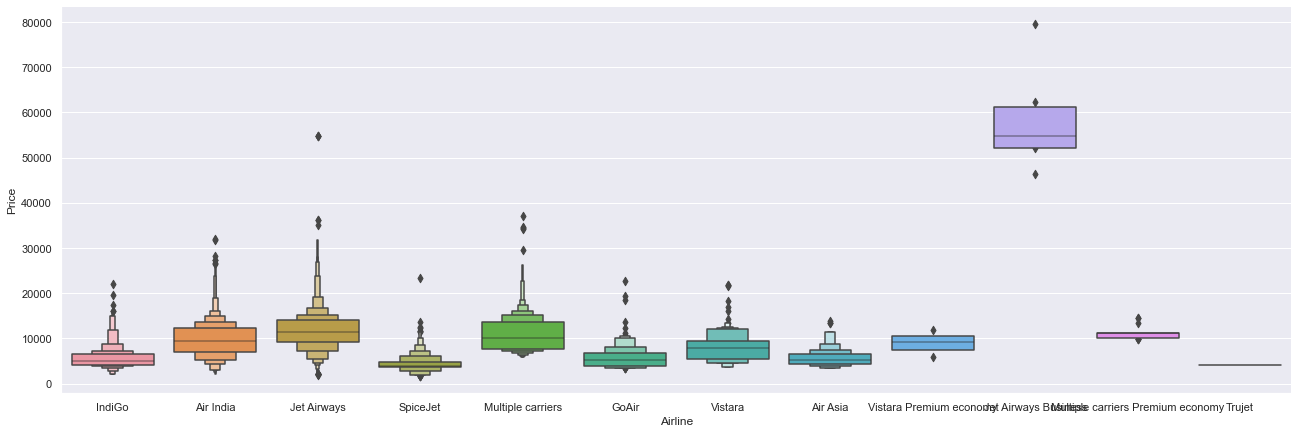

In [37]:
sns.catplot(x='Airline', y ='Price', data=train_data, height=6, aspect=3, kind='boxen')

Here only 'Jet Airways' have high price and other airlines have almost same price\
So, we use One-Hot-Encoding for column -> 'Airline'

In [38]:
airline = train_data['Airline']

airline = pd.get_dummies(airline, drop_first=True)

In [39]:
airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


### handlling  'Source'

In [40]:
train_data['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

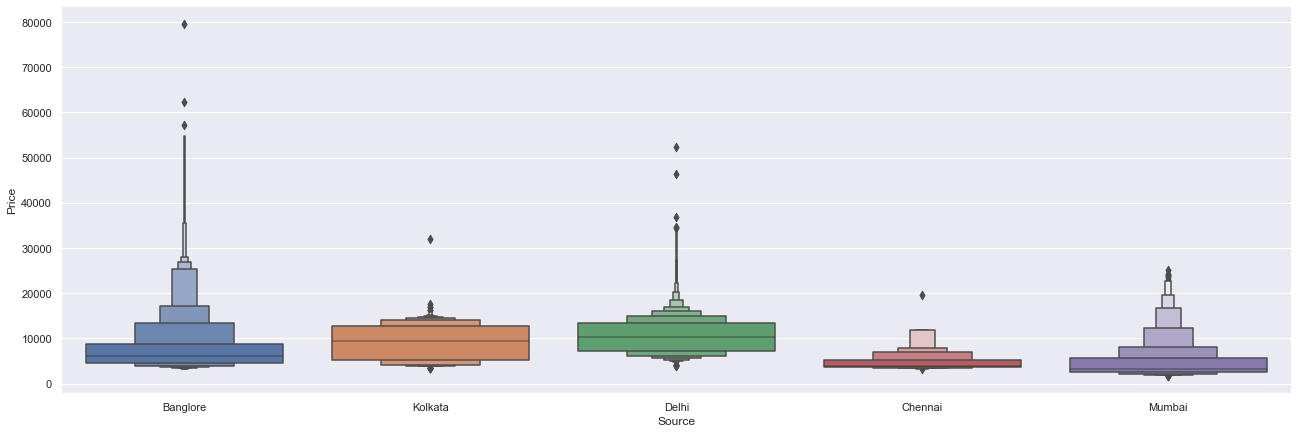

In [41]:
sns.catplot(x='Source', y ='Price', data=train_data, height=6, aspect=3, kind='boxen')
plt.show()

Here all source having almost same price\
So, we use One-Hot-Encoding for column -> 'Source'

In [42]:
source = train_data['Source']

source = pd.get_dummies(source, drop_first=True)

source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


### handling 'Destination'

In [43]:
train_data['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

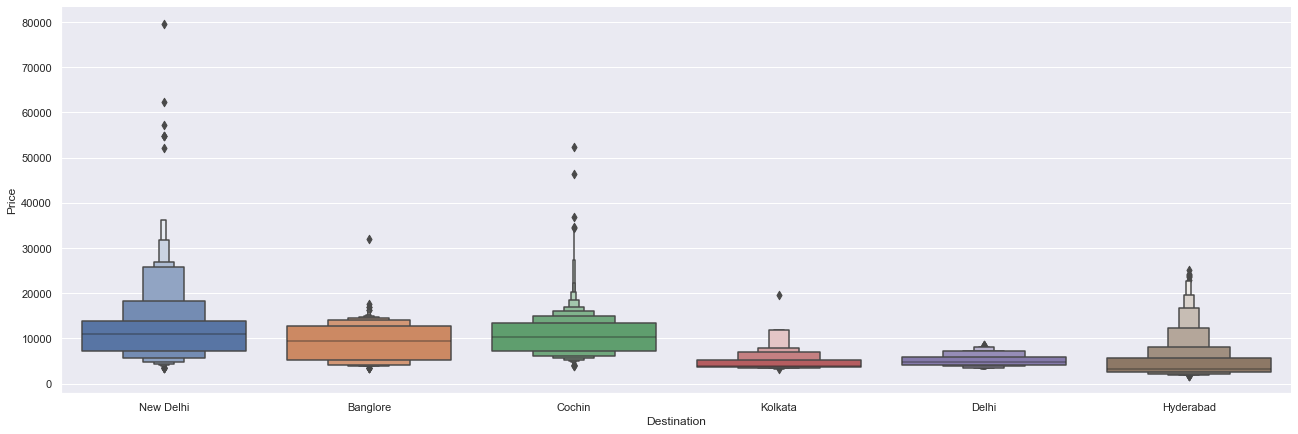

In [44]:
sns.catplot(x='Destination', y ='Price', data=train_data, height=6, aspect=3, kind='boxen')
plt.show()

Here all destination having almost same price\
So, we use One-Hot-Encoding for column -> 'Destination'

In [45]:
destination = train_data['Destination']

destination = pd.get_dummies(destination, drop_first=True)

destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


### handling 'Route'

In [46]:
train_data.Route.value_counts()

DEL ? BOM ? COK                2376
BLR ? DEL                      1552
CCU ? BOM ? BLR                 979
CCU ? BLR                       724
BOM ? HYD                       621
                               ... 
BOM ? UDR ? DEL ? HYD             1
BOM ? BBI ? HYD                   1
BLR ? HBX ? BOM ? NAG ? DEL       1
CCU ? IXA ? BLR                   1
CCU ? VTZ ? BLR                   1
Name: Route, Length: 128, dtype: int64

In [47]:
# But 'Route' and 'Total_Stops' privide same information so we will drop 'Route'

train_data.drop(columns=['Route'], axis=1, inplace=True)

### handling 'Total_Stops'

In [48]:
train_data.Total_Stops.value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

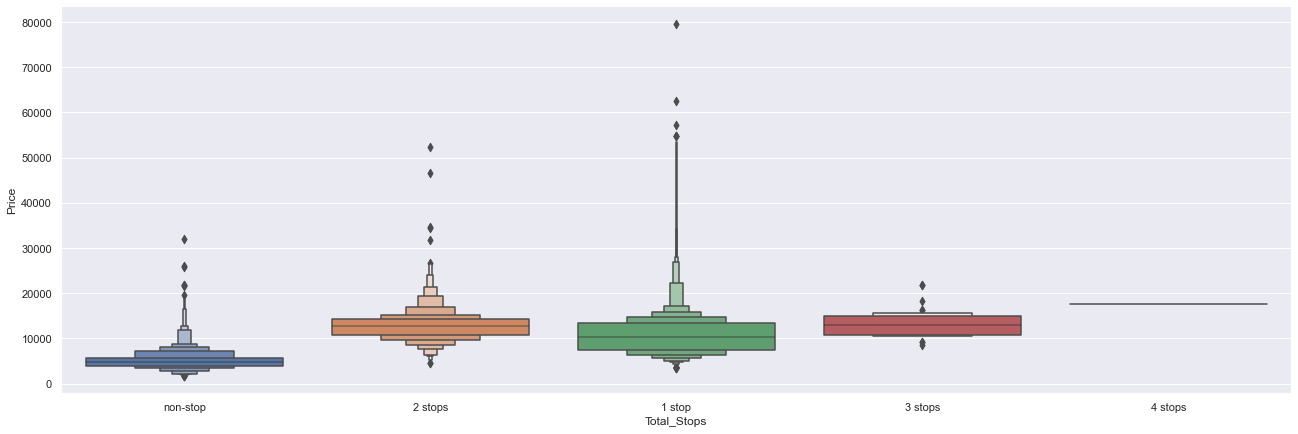

In [49]:
sns.catplot(x='Total_Stops', y ='Price', data=train_data, height=6, aspect=3, kind='boxen')
plt.show()

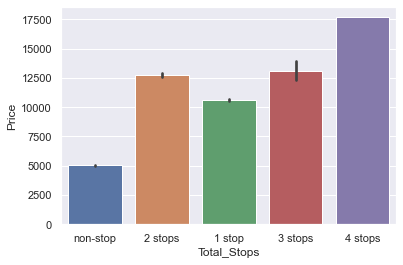

In [50]:
sns.barplot(x='Total_Stops', y ='Price', data=train_data)
plt.show()

Here price is increases when stops increases\
So, we will use label encoding -> value asign with corresponding keys

In [51]:
train_data.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [52]:
value = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}

train_data['Total_Stops'] = train_data['Total_Stops'].map(value)

In [53]:
train_data.head(3)

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hours,Duration_minute
0,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,9,25,4,25,19,0


In [54]:
# concatenate Datafeames -> airline, source, destination, train_data

data_train = pd.concat([airline, source, destination, train_data], axis=1)

In [55]:
data_train.head(3)

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_Time_hrs,Dep_Time_min,Arrival_Time_hrs,Arrival_Time_min,Duration_hours,Duration_minute
0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,IndiGo,Banglore,New Delhi,2h 50m,0,No info,3897,24,3,22,20,1,10,2,50
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Air India,Kolkata,Banglore,7h 25m,2,No info,7662,1,5,5,50,13,15,7,25
2,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,Jet Airways,Delhi,Cochin,19h,2,No info,13882,9,6,9,25,4,25,19,0


In [56]:
# droping unwanted columns

data_train.drop(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info'], axis=1, inplace=True)

In [57]:
data_train.shape

(10682, 30)

### Peforming same operation with Test Dataset

In [58]:
test_data = pd.read_csv("Test_set.csv")

In [59]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [61]:
#performing all operation that we perform for train data


test_data['Journey_day'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.day
test_data['Journey_month'] = pd.to_datetime(test_data['Date_of_Journey'], format="%d/%m/%Y").dt.month
test_data.drop(columns=['Date_of_Journey'], axis=1, inplace=True)

test_data['Dep_Time_hrs'] = pd.to_datetime(test_data.Dep_Time).dt.hour
test_data['Dep_Time_min'] = pd.to_datetime(test_data.Dep_Time).dt.minute
test_data.drop(columns=['Dep_Time'], axis=1, inplace=True)

test_data['Arrival_Time_hrs'] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data['Arrival_Time_min'] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(columns=['Arrival_Time'], axis=1, inplace=True)

duration = list(test_data['Duration'])
for i in range(len(duration)):
    if len(duration[i].split()) != 2 :
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"
        else:
            duration[i] = "0h " + duration[i]
duration_hours = []
duration_minute = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = 'h')[0]))
    
    duration_minute.append(int(duration[i].split(sep = 'm')[0].split()[-1]))

test_data['Duration_hours'] = duration_hours
test_data['Duration_minute'] = duration_minute

airline = test_data['Airline']
airline = pd.get_dummies(airline, drop_first=True)

source = test_data['Source']
source = pd.get_dummies(source, drop_first=True)

destination = test_data['Destination']
destination = pd.get_dummies(destination, drop_first=True)

test_data.drop(columns=['Route'], axis=1, inplace=True)

value = {'non-stop':0, '1 stop':1, '2 stops':2, '3 stops':3, '4 stops':4}
test_data['Total_Stops'] = test_data['Total_Stops'].map(value)

data_test = pd.concat([airline, source, destination, test_data], axis=1)

data_test.drop(['Airline', 'Source', 'Destination', 'Duration', 'Additional_Info'], axis=1, inplace=True)


In [62]:
data_test.shape

(2671, 28)

In [63]:
test_data.Airline.value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Jet Airways Business                   2
Vistara Premium economy                2
Name: Airline, dtype: int64

In [64]:
data_train.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi', 'Total_Stops', 'Price', 'Journey_day', 'Journey_month',
       'Dep_Time_hrs', 'Dep_Time_min', 'Arrival_Time_hrs', 'Arrival_Time_min',
       'Duration_hours', 'Duration_minute'],
      dtype='object')

In [65]:
data_test.columns

Index(['Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi', 'Kolkata',
       'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi',
       'Total_Stops', 'Journey_day', 'Journey_month', 'Dep_Time_hrs',
       'Dep_Time_min', 'Arrival_Time_hrs', 'Arrival_Time_min',
       'Duration_hours', 'Duration_minute'],
      dtype='object')

## Feature selection using :
1. Feature Importance
2. Information Gain
3. Heatmap

In [66]:
X = data_train.drop(['Price'],axis=1)
y = data_train['Price']

In [67]:
X.shape

(10682, 29)

In [68]:
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

<AxesSubplot:>

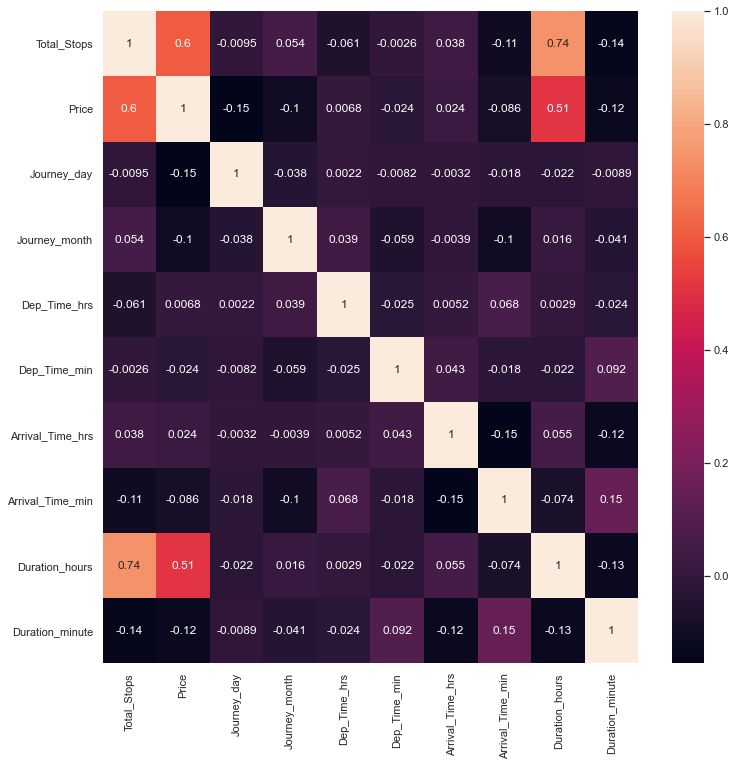

In [69]:
# heatmap

plt.figure(figsize=(12,12))
sns.heatmap(train_data.corr(),annot=True)

In [70]:
# Feature Importance bu using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

reg = ExtraTreesRegressor()
reg.fit(X,y)

ExtraTreesRegressor()

In [71]:
reg.feature_importances_

array([9.78793394e-03, 2.22099349e-03, 1.99517067e-02, 1.33598900e-01,
       6.74460853e-02, 1.84087520e-02, 8.33210525e-04, 4.02924660e-03,
       1.18383353e-04, 5.02754636e-03, 8.51027006e-05, 5.41818911e-04,
       1.18172184e-02, 3.44688558e-03, 6.52574092e-03, 8.94486315e-03,
       1.63575243e-02, 7.76803899e-03, 4.93136318e-04, 2.50916277e-02,
       2.10289597e-01, 1.43312554e-01, 5.30181947e-02, 2.41625355e-02,
       2.11918310e-02, 2.78424513e-02, 1.96642850e-02, 1.40433811e-01,
       1.75900261e-02])

In [72]:
feature_importance = pd.DataFrame({'Column':X.columns,'Importance':reg.feature_importances_})
feature_importance.head()

,Column,Importance
0,Air India,0.009788
1,GoAir,0.002221
2,IndiGo,0.019952
3,Jet Airways,0.133599
4,Jet Airways Business,0.067446


In [73]:
feature_importance.sort_values('Importance',ascending=False).head(29)

,Column,Importance
20,Total_Stops,0.210290
21,Journey_day,0.143313
27,Duration_hours,0.140434
3,Jet Airways,0.133599
4,Jet Airways Business,0.067446
22,Journey_month,0.053018
25,Arrival_Time_hrs,0.027842
19,New Delhi,0.025092
23,Dep_Time_hrs,0.024163
24,Dep_Time_min,0.021192


In [74]:
# Information Gain mutual_info_classif

from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X,y)

mutual_info_df = pd.DataFrame({'column':X.columns,'info':mutual_info})
mutual_info_df.sort_values('info')

,column,info
6,Multiple carriers Premium economy,0.000000
8,Trujet,0.000000
4,Jet Airways Business,0.006104
10,Vistara Premium economy,0.009454
1,GoAir,0.042839
9,Vistara,0.128182
11,Chennai,0.133801
18,Kolkata,0.136958
19,New Delhi,0.174528
7,SpiceJet,0.195504


## Model selection and evaluation 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [77]:
X_train.shape

(8545, 29)

In [78]:
X_test.shape

(2137, 29)

In [79]:
# for cross validation

from sklearn.model_selection import cross_val_score

#### Linear Regression

In [80]:
from sklearn.linear_model import LinearRegression

model_linear = LinearRegression()

model_linear.fit(X_train,y_train)

LinearRegression()

In [81]:
score = cross_val_score(model_linear,X_train,y_train,scoring='r2',cv=5)
score

array([ 6.19716716e-01,  6.73262725e-01,  6.16030779e-01,  5.83167640e-01,
       -2.22469116e+18])

In [82]:
score.mean()

-4.4493823159753696e+17

#### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeRegressor

model_tree = DecisionTreeRegressor()

model_tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [84]:
score = cross_val_score(model_tree,X_train,y_train,scoring='r2',cv=5)
score

array([0.64452332, 0.70963583, 0.72194144, 0.70192682, 0.68607234])

In [85]:
score.mean()

0.6928199503251538

#### Random Forest

In [86]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor()

model_rf.fit(X_train,y_train)

RandomForestRegressor()

In [87]:
y_pred = model_rf.predict(X_test)

In [88]:
model_rf.score(X_train,y_train)

0.9530747093699599

In [89]:
score = cross_val_score(model_rf,X_train,y_train,scoring='r2',cv=5)
score

array([0.81709679, 0.82490112, 0.78599312, 0.78893248, 0.79909329])

In [90]:
score.mean()

0.8032033613472829

In [91]:
model_rf.score(X_test,y_test)

0.7969833654979261

C:\Users\Administrator\anaconda3\envs\image\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


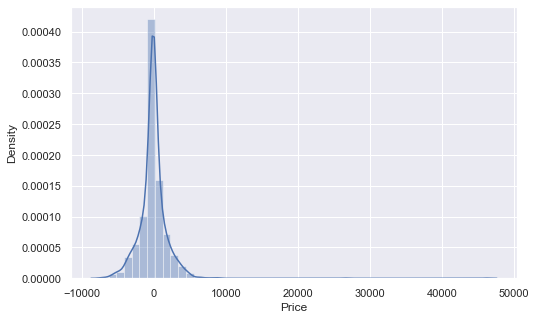

In [92]:
plt.figure(figsize=(8,5))
sns.distplot(y_test - y_pred)
plt.show()

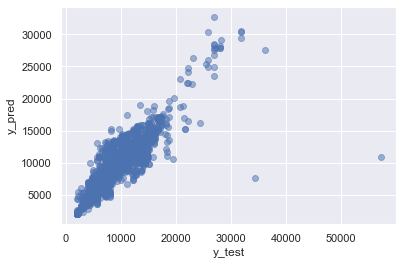

In [93]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [94]:
from sklearn import metrics 

In [95]:
print("r2 : ",metrics.r2_score(y_test, y_pred))
print("MAE : ",metrics.mean_absolute_error(y_test, y_pred))
print("MSE : ",metrics.mean_squared_error(y_test, y_pred))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

r2 :  0.7969833654979261
MAE :  1177.5839828175515
MSE :  4377456.107875483
RMSE :  2092.2371060363794


### lets try Hyperparameter Tunning by using RandomizedSearchCV

In [96]:
from sklearn.model_selection import RandomizedSearchCV 

In [97]:
# for Randomizes search CV

n_estimators = [int(x) for x in np.linspace(100,1200,12)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5,30,6)]
min_samples_split = [2, 5, 10, 15, 50, 100]
min_samples_leaf = [1, 2, 5, 10]

In [98]:
# random grid

random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf}

In [99]:
rf_random = RandomizedSearchCV(model_rf, random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=42, n_jobs=1)

In [100]:
rf_random.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.7s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.5s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=700; total time=   6.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=  10.0s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estimators=900; total time=   9.9s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=10, min_samples_split=100, n_estim

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 50,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [101]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 15}

In [102]:
rf_random.best_estimator_

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=300)

In [103]:
score = cross_val_score(rf_random.best_estimator_,X_train,y_train,scoring='r2',cv=5)
score

array([0.84323826, 0.85616458, 0.79209207, 0.80445888, 0.82267982])

In [104]:
score.mean()

0.8237267224711726

In [105]:
prediction = rf_random.predict(X_test)

C:\Users\Administrator\anaconda3\envs\image\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


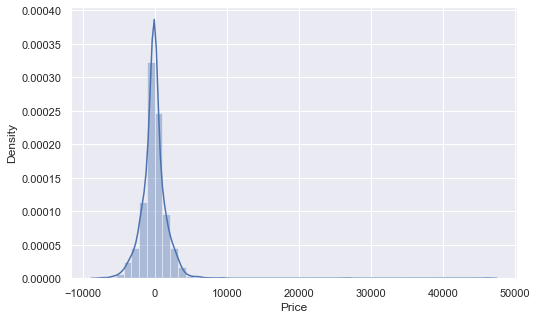

In [106]:
plt.figure(figsize=(8,5))
sns.distplot(y_test - prediction)
plt.show()

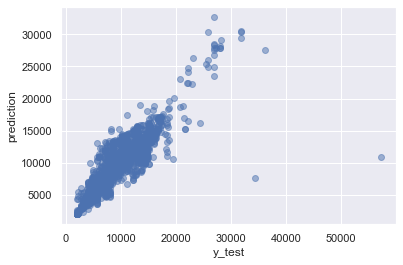

In [107]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("y_test")
plt.ylabel("prediction")
plt.show()

In [108]:
print("r2 : ",metrics.r2_score(y_test, prediction))
print("MAE : ",metrics.mean_absolute_error(y_test, prediction))
print("MSE : ",metrics.mean_squared_error(y_test, prediction))
print("RMSE : ",np.sqrt(metrics.mean_squared_error(y_test, prediction)))

r2 :  0.8160875861318289
MAE :  1137.9781190334745
MSE :  3965529.8265380603
RMSE :  1991.363810693079


### Save the nodel for reuse it again

In [109]:
import pickle

In [111]:
file = open('flight_rf.pkl','wb')


pickle.dump(rf_random, file)